# Problem 1

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df_gamma = pd.read_csv('gamma-ray.csv')
df_gamma.head(20)

,seconds,count
0,116.0,0.0
1,112.0,0.0
2,160.0,0.0
3,51.5,0.0
4,102.0,1.0
5,77.4,0.0
6,14.5,0.0
7,1070.0,3.0
8,99.1,1.0
9,49.6,0.0


In [8]:
max(df_gamma['count'])

7.0

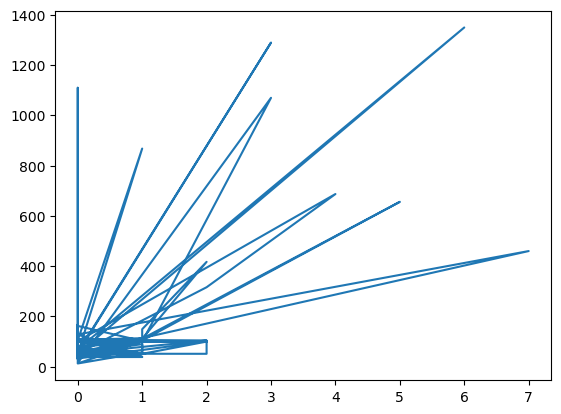

In [5]:
plt.plot(df_gamma['count'], df_gamma['seconds'])

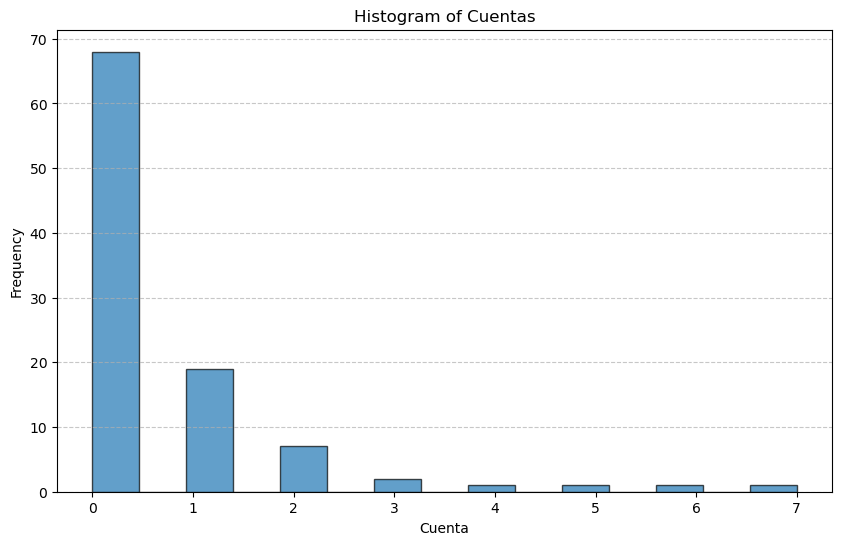

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(df_gamma['count'], bins=15, edgecolor='black', alpha=0.7)
plt.title('Histogram of Cuentas')
plt.xlabel('Cuenta')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

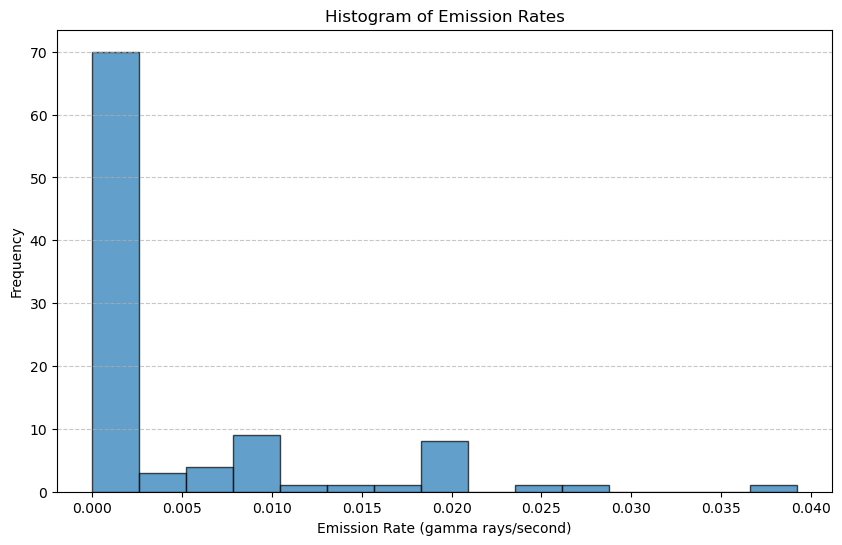

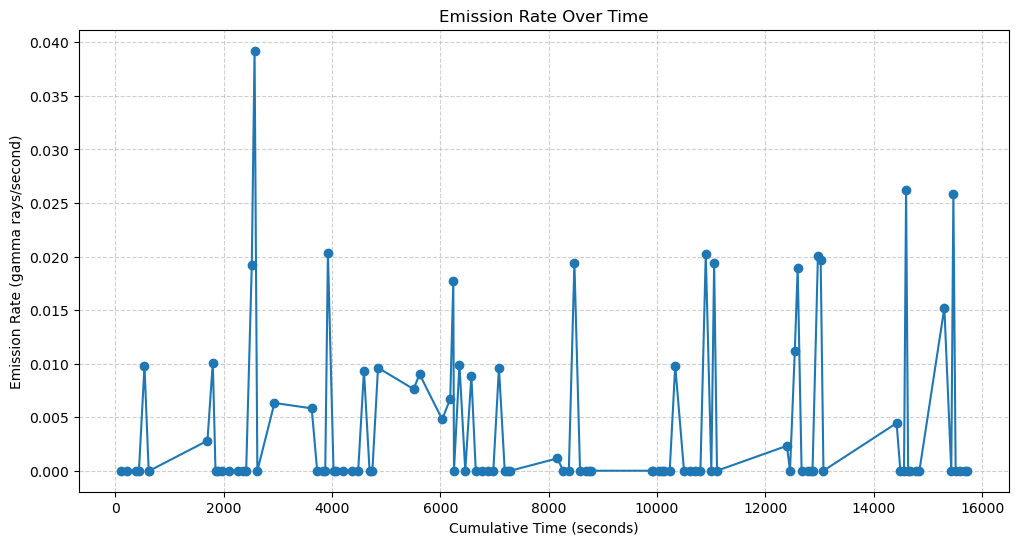


Emission rate statistics:
Mean rate: 0.0042 gamma rays/second
Standard deviation: 0.0077
Variance: 0.0001

Poisson model mean-variance relationship check:
Mean of the counts: 0.6100
Variance of the counts: 1.5534


In [11]:
df_gamma['emission_rate'] = df_gamma['count'] / df_gamma['seconds']
plt.figure(figsize=(10, 6))
plt.hist(df_gamma['emission_rate'], bins=15, edgecolor='black', alpha=0.7)
plt.title('Histogram of Emission Rates')
plt.xlabel('Emission Rate (gamma rays/second)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Step 2: Plot the emission rates over time ---
# A flat line would suggest no trend, supporting the constant rate assumption.
plt.figure(figsize=(12, 6))
df_gamma['cumulative_time'] = df_gamma['seconds'].cumsum()
plt.plot(df_gamma['cumulative_time'], df_gamma['emission_rate'], marker='o', linestyle='-')
plt.title('Emission Rate Over Time')
plt.xlabel('Cumulative Time (seconds)')
plt.ylabel('Emission Rate (gamma rays/second)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# --- Step 3: Calculate and display descriptive statistics ---
# In a Poisson model, the variance of the counts should be close to the mean.
mean_rate = df_gamma['emission_rate'].mean()
std_rate = df_gamma['emission_rate'].std()
variance_rate = df_gamma['emission_rate'].var()

print("\nEmission rate statistics:")
print(f"Mean rate: {mean_rate:.4f} gamma rays/second")
print(f"Standard deviation: {std_rate:.4f}")
print(f"Variance: {variance_rate:.4f}")

# Further check the Poisson assumption:
# Calculate the mean and variance of the counts, since in a Poisson distribution, these are approximately equal.
print("\nPoisson model mean-variance relationship check:")
print(f"Mean of the counts: {df_gamma['count'].mean():.4f}")
print(f"Variance of the counts: {df_gamma['count'].var():.4f}")

In [14]:
mle_lambda = df_gamma['count'].sum() / df_gamma['seconds'].sum()

# Imprime el resultado con la precisión requerida (3 cifras significativas)
print(f"El MLE de lambda es: {mle_lambda:.3g}")

El MLE de lambda es: 0.00388


## F3

In [19]:
## Find p-value
from scipy.stats import chi2, chi

n_degrees = 99

A_statistic = chi2.ppf(0.95, n_degrees)
#p_value = 1-chi2.cdf(A_statistic, n_degrees)
#0.05 = 1- chi2.cdf(A_statistic, n_degrees)
#0.95 = chi2.cdf(A_statistic, n_degrees)


print(f'A_statistic at significance 5% = {A_statistic:.4f}')

A_statistic at significance 5% = 123.2252


## F4

In [20]:
df_gamma.head()

,seconds,count,emission_rate,cumulative_time
0,116.0,0.0,0.000000,116.0
1,112.0,0.0,0.000000,228.0
2,160.0,0.0,0.000000,388.0
3,51.5,0.0,0.000000,439.5
4,102.0,1.0,0.009804,541.5


In [32]:
sum(df_gamma['seconds'])

15718.200000000003

In [ ]:
from scipy.stats import poisson

# Para el numerador, se asume que el lambda es igual para todos los valores, por lo tanto es solamente la :
#               suma todas las vistas/suma de todos los segundos

suma_de_vistas = sum(df_gamma['count'])
suma_de_segundos = sum(df_gamma['seconds'])

lambda_0 = suma_de_vistas/suma_de_segundos

numerador = lambda_0 * suma_de_segundos # Total de vistas dado lambda_0

# Para el denominador hay que calcular cada lambda por separado y luego multiplicarlo por sus segundos

denominador = 

#print(lambda_0)
# denominador = binom.pmf(n_death_treatment, n_exp_treatment, pi_treatment) * binom.pmf(n_death_control, n_exp_control, pi_control)

# test_statistic_A = -2*log(numerador/denominador)

# print(f'Valor para test statistic = {test_statistic_A:.4f}')

0.0038808514969907487


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2

# Supongamos que df_gamma ya está cargado con las columnas 'count' (Gi) y 'seconds' (ti)
# df_gamma = pd.read_csv('gamma-ray.csv')

# --- 1. Calcular el log-verosimilitud bajo H_A (ln(L_A)) ---
# El MLE para cada lambda_i es G_i / t_i
# ln(L_A) = sum(G_i * ln(G_i) - G_i * ln(t_i) - G_i)
# Usamos .replace(0, 1) para evitar ln(0) en caso de que count sea 0.
ln_LA = (df_gamma['count'] * np.log(df_gamma['count'].replace(0, 1))) - \
         (df_gamma['count'] * np.log(df_gamma['seconds'])) - \
         df_gamma['count']
ln_LA = ln_LA.sum()

# --- 2. Calcular el log-verosimilitud bajo H_0 (ln(L_0)) ---
# El MLE para lambda_0 es (sum G_i) / (sum t_i)
lambda_0_hat = df_gamma['count'].sum() / df_gamma['seconds'].sum()
# ln(L_0) = (sum G_i) * ln(lambda_0) + sum(G_i * ln(t_i)) - lambda_0 * (sum t_i)
ln_L0 = (df_gamma['count'].sum() * np.log(lambda_0_hat)) + \
         (df_gamma['count'] * np.log(df_gamma['seconds'])).sum() - \
         (lambda_0_hat * df_gamma['seconds'].sum())

# --- 3. Calcular el estadístico de prueba Lambda ---
# El estadístico es 2 * (ln(L_A) - ln(L_0))
lambda_statistic = 2 * (ln_LA - ln_L0)

# --- 4. Calcular el p-valor ---
# Los grados de libertad son la diferencia en el número de parámetros (100 - 1 = 99)
df = 99
p_value = chi2.sf(lambda_statistic, df)

# --- 5. Imprimir los resultados ---
print(f"Estadístico de prueba Lambda: {lambda_statistic:.4f}")
print(f"p-valor: {p_value:.3g}")

Estadístico de prueba Lambda: -577.0317
p-valor: 1


In [40]:
import numpy as np
import pandas as pd
from scipy.stats import chi2

# df es tu DataFrame con columnas 'seconds' y 'count'
# ejemplo: df = pd.read_csv('datos.csv')

# df: tu DataFrame con columnas 'seconds' y 'count'
t = df_gamma['seconds'].to_numpy(dtype=float)
k = df_gamma['count'].to_numpy(dtype=float)

# chequeos básicos
if np.any(t <= 0):
    raise ValueError("Todos los valores de 'seconds' deben ser > 0")

T = t.sum()
K = k.sum()
n = len(k)

# calcular términos k_i * log(k_i / t_i) con convención para k_i = 0
with np.errstate(divide='ignore', invalid='ignore'):
    terms = np.where(k > 0, k * np.log(k / t), 0.0)

Lambda = 2.0 * (terms.sum() - K * np.log(K / T))

# corregir posibles pequeños negativos por error numérico
Lambda = max(0.0, Lambda)

# p-valor asintótico
df_chi = n - 1
p_value = 1.0 - chi2.cdf(Lambda, df_chi)

print(f"Lambda (A(x)) = {Lambda:.4f}")
print(f"df = {df_chi}")
print(f"p-value = {p_value:.4e}")


Lambda (A(x)) = 104.3979
df = 99
p-value = 3.3577e-01


# Problem 1.4

In [ ]:
import numpy as np

# A more robust converter function that handles both bytes and strings
def safe_int_converter(s):
    if isinstance(s, bytes):
        return int(s.decode().strip('"'))
    else:
        return int(s.strip('"'))

# Load the golub.csv file
golub_data = np.genfromtxt(
    'golub_data\golub.csv', 
    delimiter=',', 
    names=True, 
    converters={0: safe_int_converter}
)

# Load the golub_cl.csv file
golub_classnames = np.genfromtxt(
    'golub_data\golub_cl.csv', 
    delimiter=',', 
    names=True, 
    converters={0: safe_int_converter}
)





In [52]:
golub_data

array([(1.000e+00, -1.45769, -1.3942 , -1.42779, -1.40715, -1.42668, -1.21719, -1.37386, -1.36832, -1.47649, -1.21583, -1.28137, -1.03209, -1.36149, -1.39979,  0.17628, -1.40095, -1.56783, -1.20466, -1.24482, -1.60767, -1.06221, -1.12665, -1.20963, -1.48332, -1.25268, -1.27619, -1.23051, -1.43337, -1.08902, -1.29865, -1.26183, -1.44434,  1.10147, -1.34158, -1.22961, -0.75919,  0.84905, -0.66465),
       (2.000e+00, -0.75161, -1.26278, -0.09052, -0.99596, -1.24245, -0.69242, -1.37386, -0.50803, -1.04533, -0.81257, -1.28137, -1.03209, -0.74005, -0.83161,  0.412  , -1.27669, -0.7437 , -1.20466, -1.0238 , -0.38779, -1.06221, -1.12665, -1.20963, -1.12185, -0.65264, -1.27619, -1.23051, -1.18065, -1.08902, -1.05094, -1.26183, -1.25918,  0.97813, -0.79357, -1.22961, -0.71792,  0.45127, -0.45804),
       (3.000e+00,  0.45695, -0.09654,  0.90325, -0.07194,  0.03232,  0.09713, -0.11978,  0.23381,  0.23987,  0.44201, -0.3956 , -0.62533,  0.45181,  1.09519,  1.09318,  0.343  ,  0.2001 ,  0.38992,  

In [53]:
golub_classnames

array([( 1., 0.), ( 2., 0.), ( 3., 0.), ( 4., 0.), ( 5., 0.), ( 6., 0.),
       ( 7., 0.), ( 8., 0.), ( 9., 0.), (10., 0.), (11., 0.), (12., 0.),
       (13., 0.), (14., 0.), (15., 0.), (16., 0.), (17., 0.), (18., 0.),
       (19., 0.), (20., 0.), (21., 0.), (22., 0.), (23., 0.), (24., 0.),
       (25., 0.), (26., 0.), (27., 0.), (28., 1.), (29., 1.), (30., 1.),
       (31., 1.), (32., 1.), (33., 1.), (34., 1.), (35., 1.), (36., 1.),
       (37., 1.), (38., 1.)], dtype=[('f0', '<f8'), ('x', '<f8')])

In [ ]:
golub_classnames.shape

(38,)

In [49]:
golub_data.shape

(3051,)

In [56]:
golub_data[1]

np.void((2.0, -0.75161, -1.26278, -0.09052, -0.99596, -1.24245, -0.69242, -1.37386, -0.50803, -1.04533, -0.81257, -1.28137, -1.03209, -0.74005, -0.83161, 0.412, -1.27669, -0.7437, -1.20466, -1.0238, -0.38779, -1.06221, -1.12665, -1.20963, -1.12185, -0.65264, -1.27619, -1.23051, -1.18065, -1.08902, -1.05094, -1.26183, -1.25918, 0.97813, -0.79357, -1.22961, -0.71792, 0.45127, -0.45804), dtype=[('f0', '<f8'), ('V1', '<f8'), ('V2', '<f8'), ('V3', '<f8'), ('V4', '<f8'), ('V5', '<f8'), ('V6', '<f8'), ('V7', '<f8'), ('V8', '<f8'), ('V9', '<f8'), ('V10', '<f8'), ('V11', '<f8'), ('V12', '<f8'), ('V13', '<f8'), ('V14', '<f8'), ('V15', '<f8'), ('V16', '<f8'), ('V17', '<f8'), ('V18', '<f8'), ('V19', '<f8'), ('V20', '<f8'), ('V21', '<f8'), ('V22', '<f8'), ('V23', '<f8'), ('V24', '<f8'), ('V25', '<f8'), ('V26', '<f8'), ('V27', '<f8'), ('V28', '<f8'), ('V29', '<f8'), ('V30', '<f8'), ('V31', '<f8'), ('V32', '<f8'), ('V33', '<f8'), ('V34', '<f8'), ('V35', '<f8'), ('V36', '<f8'), ('V37', '<f8'), ('V38',

In [58]:
golub_classnames

array([( 1., 0.), ( 2., 0.), ( 3., 0.), ( 4., 0.), ( 5., 0.), ( 6., 0.),
       ( 7., 0.), ( 8., 0.), ( 9., 0.), (10., 0.), (11., 0.), (12., 0.),
       (13., 0.), (14., 0.), (15., 0.), (16., 0.), (17., 0.), (18., 0.),
       (19., 0.), (20., 0.), (21., 0.), (22., 0.), (23., 0.), (24., 0.),
       (25., 0.), (26., 0.), (27., 0.), (28., 1.), (29., 1.), (30., 1.),
       (31., 1.), (32., 1.), (33., 1.), (34., 1.), (35., 1.), (36., 1.),
       (37., 1.), (38., 1.)], dtype=[('f0', '<f8'), ('x', '<f8')])

In [62]:
from scipy import stats
sample_names = golub_data.dtype.names[1:] 
gene_expression_data = np.stack([golub_data[name] for name in sample_names], axis=1)

# Separar las clases de muestras (ALL y AML)
class_labels = golub_classnames['x']
all_indices = np.where(class_labels == 0)[0]
aml_indices = np.where(class_labels == 1)[0]

# Paso 2: Preparar para el bucle
p_values = []
alpha = 0.05
num_genes = gene_expression_data.shape[0]

# Tamaños de las muestras
N_ALL = len(all_indices)
N_AML = len(aml_indices)

# Paso 3: Iterar a través de cada gen
for i in range(num_genes):
    # Extraer los datos del gen para cada clase
    gene_data_all = gene_expression_data[i, all_indices]
    gene_data_aml = gene_expression_data[i, aml_indices]

    # Calcular las medias y varianzas
    mean_all = np.mean(gene_data_all)
    mean_aml = np.mean(gene_data_aml)
    var_all = np.var(gene_data_all, ddof=1)
    var_aml = np.var(gene_data_aml, ddof=1)

    # Calcular el estadístico t de Welch
    numerator = mean_all - mean_aml
    denominator = np.sqrt(var_all / N_ALL + var_aml / N_AML)

    if denominator == 0:
        p_values.append(1.0)
        continue
    
    t_statistic = numerator / denominator

    # Calcular los grados de libertad de Welch
    num_df = (var_all / N_ALL + var_aml / N_AML)**2
    den_df = (var_all / N_ALL)**2 / (N_ALL - 1) + (var_aml / N_AML)**2 / (N_AML - 1)
    
    if den_df == 0:
        p_values.append(1.0)
        continue
        
    degrees_of_freedom = num_df / den_df

    # Calcular el valor p (dos colas)
    # Se utiliza stats.t.sf para evitar conflictos de nombres
    p_value = 2 * stats.t.sf(np.abs(t_statistic), degrees_of_freedom)
    p_values.append(p_value)

# Paso 4: Contar los genes significativos
significant_genes = np.sum(np.array(p_values) <= alpha)

print(f"El número de genes significativos (p <= {alpha}) es: {significant_genes}")

El número de genes significativos (p <= 0.05) es: 1078


## Part B: Holm Correction

In [ ]:
p_values # Original
p_values_sorted = p_values.copy() # Se crea copia a modificar
p_values_sorted.sort()

alpha = 0.05
M = len(p_values_sorted)
significativos = 0

for i in range(1, M+1):
    adjusted_threashold = alpha/(M-i+1)
    if p_values_sorted[i-1] <= adjusted_threashold:
        significativos += 1
    else:
        break

print(f"El número de genes significativos (p <= {alpha}) para metodo Holm es: {significativos}")

El número de genes significativos (p <= 0.05) para metodo Holm es: 103


## Benjamini-Hochberg Correction

In [83]:
p_values # Original
p_values_sorted = p_values.copy() # Se crea copia a modificar
p_values_sorted.sort()

alpha = 0.05
M = len(p_values_sorted)
significativos = 0

for i in range(1, M+1):
    adjusted_threashold = alpha*(i)/M
    if p_values_sorted[i] <= adjusted_threashold:
        significativos += 1
        
    else:
        break

print(f"El número de genes significativos (p <= {alpha}) para metodo Benjamin es: {significativos}")

El número de genes significativos (p <= 0.05) para metodo Benjamin es: 694


# Problem 1.5

In [88]:
R = 0.25
alpha = 0.05
beta = 0.3
print(R*(1-beta)/(R+alpha))

0.5833333333333334


In [ ]:
R = 0.25
alpha = 0.05
beta = 0.3
print(R*(1-beta)/(R+alpha))

# Problem 1.6

## Part A and B

In [2]:
import pandas as pd
import numpy as np

info_y = pd.read_csv('syn_y.csv', header = None).values
info_x = pd.read_csv('syn_X.csv', header = None).values

In [ ]:
info_y = pd.read_csv('syn_y.csv', header = None).values
info_x = pd.read_csv('syn_X.csv', header = None).values

def add_intercept(X):
  return np.concatenate((np.ones_like(X[:,:1]), X), axis=1)

X_with_ones = add_intercept(info_x)
OLS = np.linalg.inv(X_with_ones.T @ X_with_ones) @ X_with_ones.T @ info_y

result = np.round(OLS.flatten(), 3).tolist()
print(result)

[1.93, 1.264, -4.598]


## Part C

In [63]:
def gradient_descent(X, y, step_size, precision = 10**-6):
    # Start beta with zeros 
    beta = np.zeros((X.shape[1], 1))

    beta_prev = beta + 1.0  # Just so the loop starts
    iterations = 0
    while np.linalg.norm(beta - beta_prev) / np.linalg.norm(beta_prev) > precision:
        beta_prev = beta.copy()
        # Since we want to minimize (y - X @ beta).T @ (y - X @ beta), we find the gradiente like -2X.T(y- X@beta)
        gradiente =  -2 * X.T @ (y- X @ beta)

        beta = beta_prev - gradiente * step_size

        iterations +=1
    return beta, iterations

def step_finder(X_with_ones, info_y):
    test_step_sizes = np.logspace(-7, -2, 50)  # From 1e-7 to 1e-2
    min_iterations = float('inf')
    optimal_step_size = None

    print("Testing different step sizes:")
    for alpha in test_step_sizes:
        try:
            beta, iterations = gradient_descent(X_with_ones, info_y, alpha)
            print(f"  Step Size: {alpha:.8f} -> Iterations: {iterations}")
            if iterations < min_iterations:
                min_iterations = iterations
                optimal_step_size = alpha

        except np.linalg.LinAlgError:
            # This can happen if the step size is too large and the values diverge
            pass
        except OverflowError:
            pass

    print(f"\nOptimal Step Size found: {optimal_step_size:.8f} with {min_iterations} iterations.")
    return beta


beta = step_finder(X_with_ones, info_y)
final_beta = np.round(beta.flatten(), 3).tolist()
print(final_beta)


Testing different step sizes:


C:\Users\user\AppData\Local\Temp\ipykernel_28220\810535096.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  while np.linalg.norm(beta - beta_prev) / np.linalg.norm(beta_prev) > precision:


  Step Size: 0.00000010 -> Iterations: 147403
  Step Size: 0.00000013 -> Iterations: 125203
  Step Size: 0.00000016 -> Iterations: 105919
  Step Size: 0.00000020 -> Iterations: 89279
  Step Size: 0.00000026 -> Iterations: 75003
  Step Size: 0.00000032 -> Iterations: 62820
  Step Size: 0.00000041 -> Iterations: 52470
  Step Size: 0.00000052 -> Iterations: 43715
  Step Size: 0.00000066 -> Iterations: 36337
  Step Size: 0.00000083 -> Iterations: 30140
  Step Size: 0.00000105 -> Iterations: 24951
  Step Size: 0.00000133 -> Iterations: 20619
  Step Size: 0.00000168 -> Iterations: 17010
  Step Size: 0.00000212 -> Iterations: 14011
  Step Size: 0.00000268 -> Iterations: 11525
  Step Size: 0.00000339 -> Iterations: 9467
  Step Size: 0.00000429 -> Iterations: 7766
  Step Size: 0.00000543 -> Iterations: 6364
  Step Size: 0.00000687 -> Iterations: 5209
  Step Size: 0.00000869 -> Iterations: 4259
  Step Size: 0.00001099 -> Iterations: 3479
  Step Size: 0.00001389 -> Iterations: 2839
  Step Size: 0

C:\Users\user\AppData\Local\Temp\ipykernel_28220\810535096.py:7: RuntimeWarning: invalid value encountered in scalar divide
  while np.linalg.norm(beta - beta_prev) / np.linalg.norm(beta_prev) > precision:


## Parte C.2 Prueb Escalada

In [127]:
import numpy as np
import pandas as pd

# Carga de datos
info_y = pd.read_csv('syn_y.csv', header = None).values
info_x = pd.read_csv('syn_X.csv', header = None).values

def standardize(X):
    # Calcula la media y la desviación estándar de cada característica (columna)
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    
    # Maneja la división por cero para columnas con desviación estándar de 0
    std[std == 0] = 1
    
    # Estandariza los datos
    X_scaled = (X - mean) / std
    return X_scaled, mean, std

def standardize_xy(X, y):
    """
    Standardizes both the feature matrix X and the target vector y.
    Returns scaled data and the means/stds for later unscaling.
    """
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0)
    y_mean = np.mean(y)
    y_std = np.std(y)
    
    # Handle division by zero for columns with a standard deviation of 0
    X_std[X_std == 0] = 1
    if y_std == 0:
        y_std = 1
        
    X_scaled = (X - X_mean) / X_std
    y_scaled = (y - y_mean) / y_std
    
    return X_scaled, y_scaled, X_mean, X_std, y_mean, y_std

# PASO 1: Escalar las variables de entrada 'info_x'
# Guardamos la media y la desviación estándar para poder des-escalar los resultados más tarde si es necesario.
# PASO 2: Agregar el intercepto a los datos escalados
def add_intercept(X):
    return np.concatenate((np.ones_like(X[:,:1]), X), axis=1)

# El resto de tu código sigue igual
# def gradient_descent(X, y, step_size, precision = 10**-6):
#     # Start beta with zeros 
#     beta = np.zeros((X.shape[1], 1))
#     beta_prev = beta + 1.0 
#     iterations = 0
#     while np.linalg.norm(beta - beta_prev) / np.linalg.norm(beta_prev) > precision:
#         beta_prev = beta.copy()
#         gradiente =  -2 * X.T @ (y - X @ beta)
#         beta = beta_prev - gradiente * step_size
#         iterations +=1
#     return beta, iterations

def gradient_descent(X, y, step_size, precision=1e-6):
    n = X.shape[0]
    beta = np.zeros((X.shape[1], 1))
    beta_prev = beta + 1.0
    iterations = 0
    
    while np.linalg.norm(beta - beta_prev) / np.linalg.norm(beta_prev) > precision:
        beta_prev = beta.copy()
        gradiente = -2 * (X.T @ (y - X @ beta)) / n
        beta = beta_prev - gradiente * step_size
        iterations += 1
    
    return beta, iterations

def step_finder(X_with_ones, info_y):
    test_step_sizes = np.logspace(-7, -2, 50) 
    min_iterations = float('inf')
    optimal_step_size = None
    optimal_beta = None

    print("Probando diferentes tamaños de paso:")
    for alpha in test_step_sizes:
        try:
            beta, iterations = gradient_descent(X_with_ones, info_y, alpha)
            print(f"  Tamaño de Paso: {alpha:.12f} -> Iteraciones: {iterations}")
            
            if iterations < min_iterations:
                min_iterations = iterations
                optimal_step_size = alpha
                optimal_beta = beta
                
        except (np.linalg.LinAlgError, OverflowError):
            print(f"  Tamaño de Paso: {alpha:.12f} -> ¡Divergencia! Saltando...")
            
    print(f"\nTamaño de Paso Óptimo encontrado: {optimal_step_size:.12f} con {min_iterations} iteraciones.")
    
    return optimal_beta

def unscale_beta(beta_scaled, X_mean, X_std, y_mean, y_std):
    """
    Converts the scaled beta coefficients back to their original scale.
    """
    beta_unscaled = np.zeros_like(beta_scaled)
    beta_unscaled[0] = y_mean - np.sum(beta_scaled[1:] * X_mean / X_std) * y_std
    beta_unscaled[1:] = (y_std / X_std).reshape(-1, 1) * beta_scaled[1:]
    return beta_unscaled

# Llamada a la función con los datos escalados

info_x_scaled, x_mean, x_std = standardize(info_x)
X_with_ones = add_intercept(info_x_scaled)
beta_scaled = step_finder(X_with_ones, info_y)
final_beta = np.round(beta_scaled.flatten(), 3).tolist()
print(final_beta)
# [1.93, 1.264, -4.598]



x_mortal_scaled, y_mortal_scaled, x_mortal_mean, x_mortal_std, y_mortal_mean, y_mortal_std = standardize_xy(info_x, info_y)

# Add the intercept to the scaled X data
x_mortal_with_ones = add_intercept(x_mortal_scaled)

# Find the optimal beta using the scaled data
beta_scaled = step_finder(x_mortal_with_ones, y_mortal_scaled)

# Unscale the beta vector to get the final solution
beta_unscaled = unscale_beta(beta_scaled, x_mortal_mean, x_mortal_std, y_mortal_mean, y_mortal_std)

# Print the final result
#final_beta = np.round(beta_unscaled.flatten(), 3).tolist()
final_beta = np.round(beta_unscaled.flatten(), 3).tolist()

print("\nFinal Beta Vector (Original Scale):")
print(final_beta)
# [2.525, 1.264, -4.598]


Probando diferentes tamaños de paso:


C:\Users\user\AppData\Local\Temp\ipykernel_28220\192110900.py:65: RuntimeWarning: divide by zero encountered in scalar divide
  while np.linalg.norm(beta - beta_prev) / np.linalg.norm(beta_prev) > precision:


  Tamaño de Paso: 0.000000100000 -> Iteraciones: 913860
  Tamaño de Paso: 0.000000126486 -> Iteraciones: 894184
  Tamaño de Paso: 0.000000159986 -> Iteraciones: 870832
  Tamaño de Paso: 0.000000202359 -> Iteraciones: 843475
  Tamaño de Paso: 0.000000255955 -> Iteraciones: 811901
  Tamaño de Paso: 0.000000323746 -> Iteraciones: 776063
  Tamaño de Paso: 0.000000409492 -> Iteraciones: 736121
  Tamaño de Paso: 0.000000517947 -> Iteraciones: 692470
  Tamaño de Paso: 0.000000655129 -> Iteraciones: 645734
  Tamaño de Paso: 0.000000828643 -> Iteraciones: 596738
  Tamaño de Paso: 0.000001048113 -> Iteraciones: 546443
  Tamaño de Paso: 0.000001325711 -> Iteraciones: 495870
  Tamaño de Paso: 0.000001676833 -> Iteraciones: 446016
  Tamaño de Paso: 0.000002120951 -> Iteraciones: 397784
  Tamaño de Paso: 0.000002682696 -> Iteraciones: 351927
  Tamaño de Paso: 0.000003393222 -> Iteraciones: 309022
  Tamaño de Paso: 0.000004291934 -> Iteraciones: 269459
  Tamaño de Paso: 0.000005428675 -> Iteraciones:

KeyboardInterrupt: 

### Same but scaled

## Part D

In [33]:
mortality = pd.read_csv('mortality.csv').values

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distributions(df):
    """
    Plots a histogram for each variable in a DataFrame to visualize its distribution.

    Args:
        df (pd.DataFrame): The DataFrame containing the variables to plot.
    """
    # Get the number of variables (columns)
    num_vars = df.shape[1]
    
    # Calculate the number of rows and columns for the subplots
    num_cols = 2
    num_rows = (num_vars + num_cols - 1) // num_cols
    
    # Create the figure and subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 5 * num_rows))
    
    # Flatten the axes array for easy iteration if there's more than one row
    axes = axes.flatten() if num_rows > 1 else [axes]
    
    # Iterate over each column and plot its distribution
    for i, col in enumerate(df.columns):
        if i < len(axes): # Check to not go out of bounds
            sns.histplot(df[col], kde=True, ax=axes[i])
            axes[i].set_title(f'Distribución de {col}', fontsize=14)
            axes[i].set_xlabel(col, fontsize=12)
            axes[i].set_ylabel('Frecuencia', fontsize=12)
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
        
    plt.tight_layout()
    plt.show()

# --- Ejemplo de uso ---
# Primero, carga los datos. Asume que 'mortality.csv' ya está en la misma carpeta.
file_path = 'mortality.csv'
df = pd.read_csv(file_path)

# Elimina la columna de ciudades para que solo queden las variables numéricas
df_numeric = df.iloc[:, 1:]

# Llama a la función para graficar la distribución de las variables
plot_distributions(df_numeric)

In [72]:
df.head()

,City,Mortality,JanTemp,JulyTemp,RelHum,Rain,Educ,Dens,NonWhite,WhiteCollar,Pop,House,Income,HC,NOx,SO2
0,"Akron, OH",921.87,27,71,59,36,11.4,3243,8.8,42.6,660328,3.34,29560,21,15,59
1,"Albany-Schenectady-Troy, NY",997.87,23,72,57,35,11.0,4281,3.5,50.7,835880,3.14,31458,8,10,39
2,"Allentown, Bethlehem,PA-NJ",962.35,29,74,54,44,9.8,4260,0.8,39.4,635481,3.21,31856,6,6,33
3,"Atlanta, GA",982.29,45,79,56,47,11.1,3125,27.1,50.2,2138231,3.41,32452,18,8,24
4,"Baltimore, MD",1071.29,35,77,55,43,9.6,6441,24.4,43.7,2199531,3.44,32368,43,38,206


In [125]:
#y_mortal = df['Mortality'].values
y_mortal = df['Mortality'].values.reshape(-1, 1)
x_mortal = df.iloc[:, 2:].values

print("Forma de x_mortal:", x_mortal.shape)
print("Forma de y_mortal:", y_mortal.shape)

Forma de x_mortal: (59, 14)
Forma de y_mortal: (59, 1)


In [126]:
x_mortal_ones = add_intercept(x_mortal)
OLS = np.linalg.inv(x_mortal_ones.T @ x_mortal_ones) @ x_mortal_ones.T @ y_mortal

result = np.round(OLS.flatten(), 10).tolist()
print(result)

[1400.0347123499, -1.4411203443, -2.950250048, 0.1360095507, 0.9695079278, -11.0466624373, 0.0047170652, 5.3027136761, -1.4923188228, 3.4023e-06, -38.0416445338, -0.0004251864, -0.6712474784, 1.1785076843, 0.0845829777]


In [120]:
x_mortal_with_ones[0]

array([ 1.        , -0.67523729, -0.74667036,  0.23510196, -0.21860508,
        0.51443804, -0.4669668 , -0.34483418, -0.7532874 , -0.50876723,
        0.51492494, -0.8312604 , -0.19025052, -0.17217099,  0.06886095])

In [121]:
x_mortal_scaled, y_mortal_scaled, x_mortal_mean, x_mortal_std, y_mortal_mean, y_mortal_std = standardize_xy(x_mortal, y_mortal)

# Add the intercept to the scaled X data
x_mortal_with_ones = add_intercept(x_mortal_scaled)

# Find the optimal beta using the scaled data
beta_scaled = step_finder(x_mortal_with_ones, y_mortal_scaled)

# Unscale the beta vector to get the final solution
beta_unscaled = unscale_beta(beta_scaled, x_mortal_mean, x_mortal_std, y_mortal_mean, y_mortal_std)

# Print the final result
final_beta = np.round(beta_unscaled.flatten(), 3).tolist()

print("\nFinal Beta Vector (Original Scale):")

print(final_beta)

Probando diferentes tamaños de paso:


C:\Users\user\AppData\Local\Temp\ipykernel_28220\3849732832.py:52: RuntimeWarning: divide by zero encountered in scalar divide
  while np.linalg.norm(beta - beta_prev) / np.linalg.norm(beta_prev) > precision:


  Tamaño de Paso: 0.000000100000 -> Iteraciones: 349424
  Tamaño de Paso: 0.000000126486 -> Iteraciones: 337904
  Tamaño de Paso: 0.000000159986 -> Iteraciones: 322437
  Tamaño de Paso: 0.000000202359 -> Iteraciones: 303834
  Tamaño de Paso: 0.000000255955 -> Iteraciones: 283189
  Tamaño de Paso: 0.000000323746 -> Iteraciones: 261536
  Tamaño de Paso: 0.000000409492 -> Iteraciones: 239843
  Tamaño de Paso: 0.000000517947 -> Iteraciones: 219101
  Tamaño de Paso: 0.000000655129 -> Iteraciones: 200510
  Tamaño de Paso: 0.000000828643 -> Iteraciones: 186073
  Tamaño de Paso: 0.000001048113 -> Iteraciones: 181893
  Tamaño de Paso: 0.000001325711 -> Iteraciones: 233757
  Tamaño de Paso: 0.000001676833 -> Iteraciones: 334412
  Tamaño de Paso: 0.000002120951 -> Iteraciones: 382808
  Tamaño de Paso: 0.000002682696 -> Iteraciones: 397704
  Tamaño de Paso: 0.000003393222 -> Iteraciones: 391865
  Tamaño de Paso: 0.000004291934 -> Iteraciones: 373192
  Tamaño de Paso: 0.000005428675 -> Iteraciones:

C:\Users\user\AppData\Local\Temp\ipykernel_28220\3849732832.py:52: RuntimeWarning: invalid value encountered in scalar divide
  while np.linalg.norm(beta - beta_prev) / np.linalg.norm(beta_prev) > precision:


In [ ]:
# Unscale the beta vector to get the final solution
beta_unscaled = unscale_beta(beta_scaled, x_mortal_mean, x_mortal_std, y_mortal_mean, y_mortal_std)

# Print the final result
#final_beta = np.round(beta_unscaled.flatten(), 3).tolist()
final_beta = np.round(beta_unscaled.flatten(), 3).tolist()

print("\nFinal Beta Vector (Original Scale):")

print(final_beta)

In [124]:
import numpy as np
import pandas as pd

def find_optimal_beta(x_mortal, y_mortal):
    """
    Calcula el vector beta óptimo para un modelo de regresión lineal
    usando el método de Mínimos Cuadrados Ordinarios (MCO).

    Args:
        x_mortal (np.ndarray): La matriz de variables independientes.
        y_mortal (np.ndarray): El vector de la variable dependiente.

    Returns:
        np.ndarray: El vector beta óptimo.
    """
    # 1. Asegurarse de que y_mortal sea un vector columna
    y_mortal = y_mortal.reshape(-1, 1)

    # 2. Agregar una columna de unos para el término de intercepción
    X_with_intercept = np.concatenate((np.ones((x_mortal.shape[0], 1)), x_mortal), axis=1)

    # 3. Calcular beta usando la fórmula de MCO: beta = inv(X.T @ X) @ X.T @ y
    XT = X_with_intercept.T
    beta_optimal = np.linalg.inv(XT @ X_with_intercept) @ XT @ y_mortal

    return beta_optimal

# Ejemplo de uso
# Cargar los datos (asumiendo que 'mortality.csv' está en la misma carpeta)
df = pd.read_csv('mortality.csv')
y_mortal = df['Mortality'].values
x_mortal = df.drop(columns=['City', 'Mortality']).values

# Encontrar el beta óptimo
beta_found = find_optimal_beta(x_mortal, y_mortal)

# Formatear el resultado a 3 decimales
final_beta = np.round(beta_found.flatten(), 3).tolist()

print("Vector Beta encontrado usando MCO:")
print(final_beta)

Vector Beta encontrado usando MCO:
[1400.035, -1.441, -2.95, 0.136, 0.97, -11.047, 0.005, 5.303, -1.492, 0.0, -38.042, -0.0, -0.671, 1.179, 0.085]


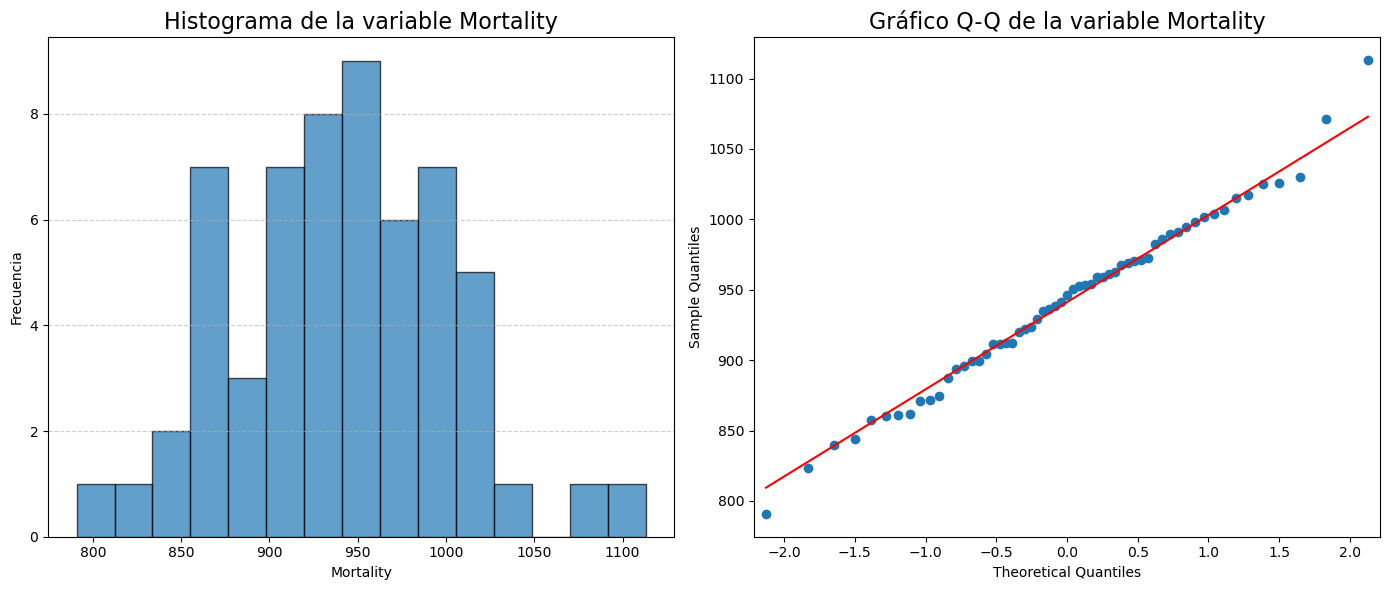

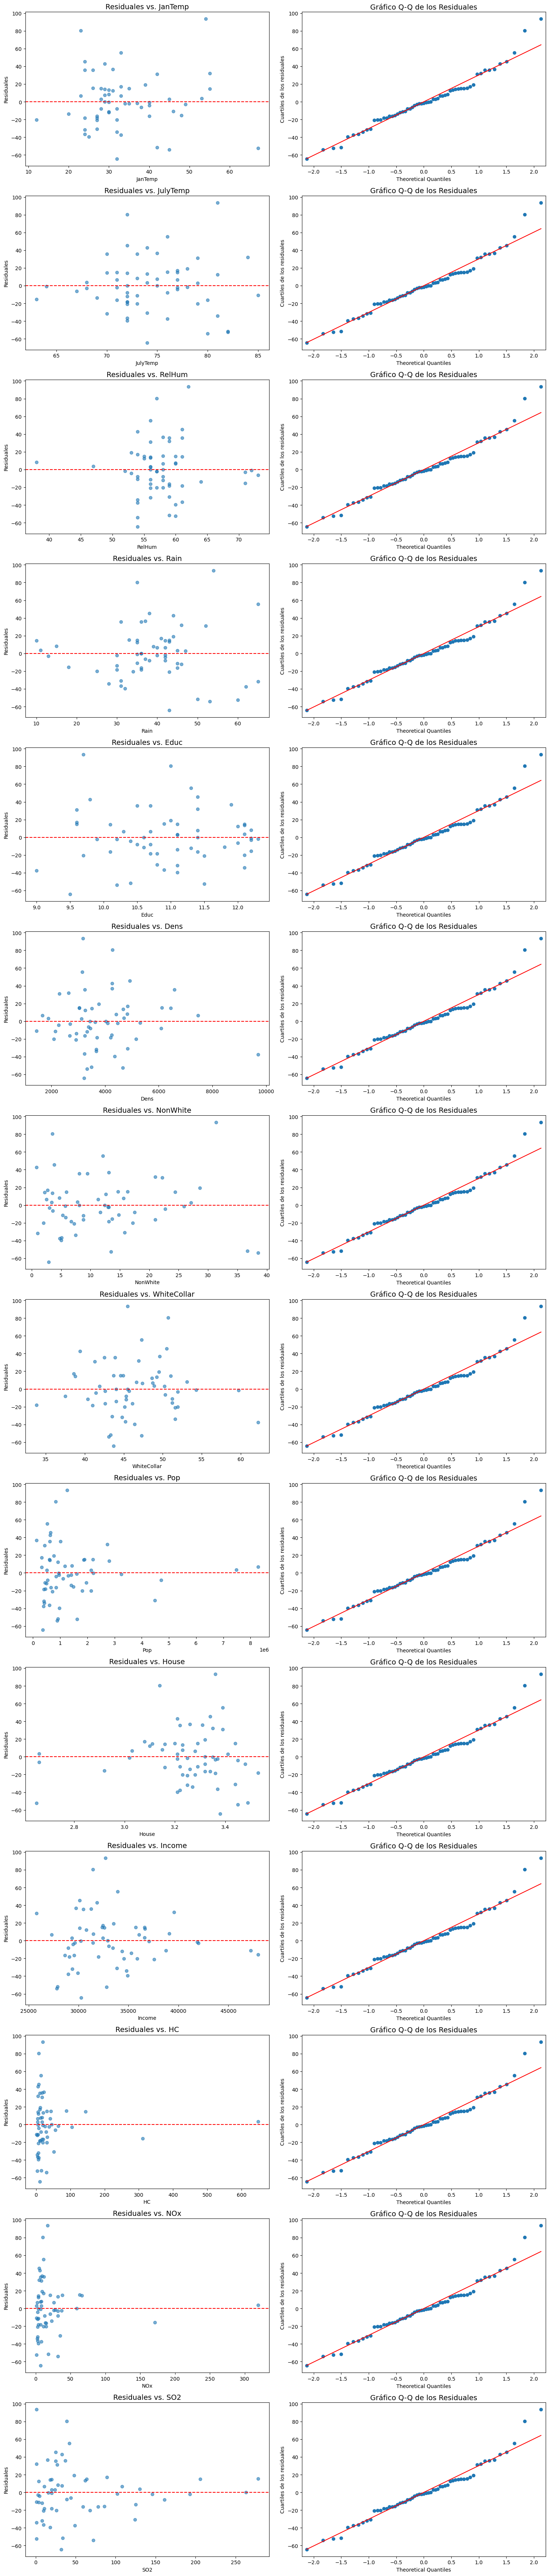

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

def plot_mortality_diagnostics(df):
    """
    Genera un histograma y un gráfico Q-Q para la variable 'Mortality'.
    """
    # 1. Extraer la columna 'Mortality'
    y = df['Mortality'].values
    
    # 2. Configurar la figura para los gráficos
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # 3. Graficar el histograma
    axes[0].hist(y, bins=15, edgecolor='k', alpha=0.7)
    axes[0].set_title('Histograma de la variable Mortality', fontsize=16)
    axes[0].set_xlabel('Mortality')
    axes[0].set_ylabel('Frecuencia')
    axes[0].grid(axis='y', linestyle='--', alpha=0.6)
    
    # 4. Graficar el Q-Q plot
    sm.qqplot(y, line='s', ax=axes[1])
    axes[1].set_title('Gráfico Q-Q de la variable Mortality', fontsize=16)
    
    plt.tight_layout()
    plt.show()

def plot_variable_diagnostics(df):
    """
    Genera gráficos de residuales y Q-Q para cada variable de un DataFrame,
    después de eliminar la columna 'city'.
    """
    # Eliminar explícitamente la columna 'city'
    df_temp = df.drop(columns=['City'])
    
    # 1. Preparar los datos
    y = df_temp['Mortality'].values.reshape(-1, 1)
    X = df_temp.drop(columns=['Mortality']).values

    # 2. Añadir el intercepto y ajustar un modelo OLS para obtener los residuales
    X_with_intercept = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
    
    try:
        beta_ols = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y
        y_pred = X_with_intercept @ beta_ols
        residuals = y - y_pred
    except np.linalg.LinAlgError:
        print("La matriz X.T @ X es singular. Intenta estandarizar los datos o remover variables colineales.")
        return

    # 3. Graficar los residuales y los gráficos Q-Q para cada variable
    num_vars = X.shape[1]
    fig, axes = plt.subplots(num_vars, 2, figsize=(15, 5 * num_vars))
    
    column_names = df_temp.drop(columns=['Mortality']).columns
    
    for i, col_name in enumerate(column_names):
        # Gráfico de Residuales
        axes[i, 0].scatter(X[:, i], residuals, alpha=0.6)
        axes[i, 0].set_title(f'Residuales vs. {col_name}', fontsize=14)
        axes[i, 0].set_xlabel(col_name)
        axes[i, 0].set_ylabel('Residuales')
        axes[i, 0].axhline(y=0, color='r', linestyle='--')
        
        # Gráfico Q-Q
        sm.qqplot(residuals.flatten(), line='s', ax=axes[i, 1])
        axes[i, 1].set_title(f'Gráfico Q-Q de los Residuales', fontsize=14)
        axes[i, 1].set_ylabel('Cuartiles de los residuales')
        
    plt.tight_layout()
    plt.show()

# Suponiendo que el DataFrame 'df' ya está cargado con los datos
# df = pd.read_csv('mortality.csv')
# Llama a las funciones
plot_mortality_diagnostics(df)
plot_variable_diagnostics(df)

<Figure size 600x500 with 0 Axes>

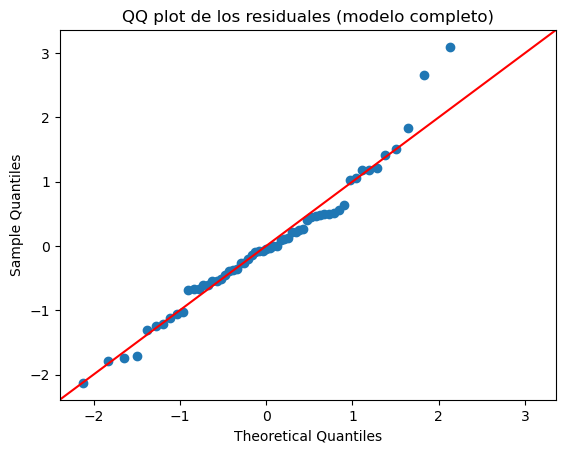

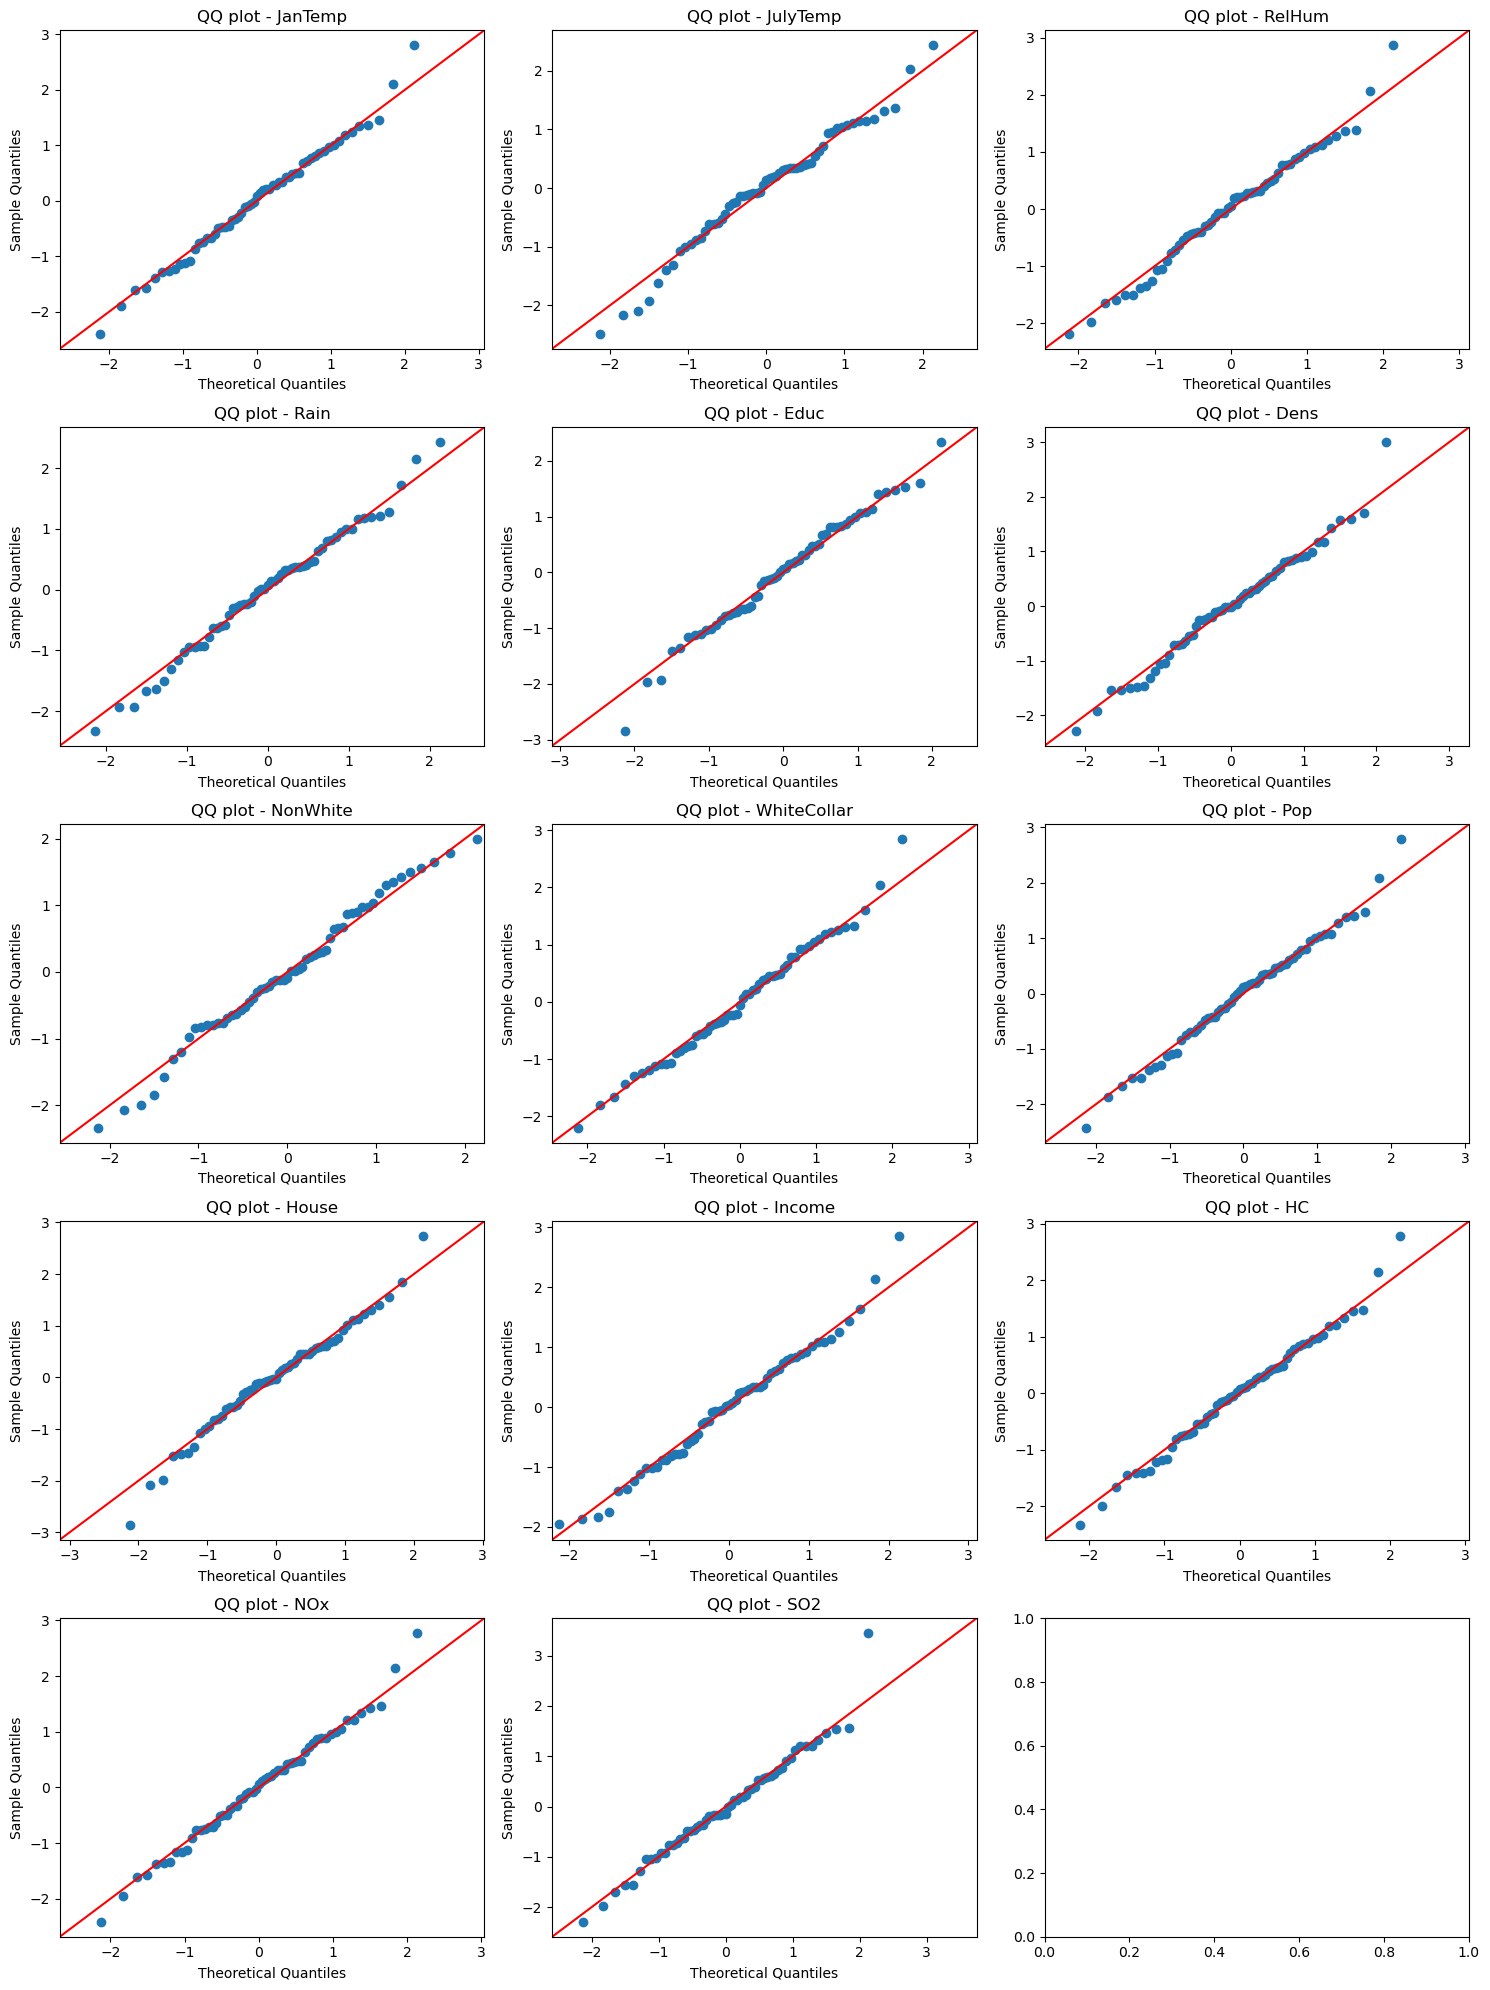

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats

df_mortality = pd.read_csv('mortality.csv')

df_mortality.drop(columns = ['City'], inplace = True)
# Supongamos que tu dataframe se llama df_mortality
# y que la columna target es "mortality"
y = df_mortality["Mortality"]
X = df_mortality.drop(columns=["Mortality"])

# Agregamos intercepto para OLS
X = sm.add_constant(X)

# Ajustamos modelo OLS
model = sm.OLS(y, X).fit()

# Residuales del modelo
residuals = model.resid

# QQ plot de los residuales del modelo completo
plt.figure(figsize=(6, 5))
sm.qqplot(residuals, line="45", fit=True)
plt.title("QQ plot de los residuales (modelo completo)")
plt.show()

# Ahora analizamos cada variable por separado
fig, axs = plt.subplots(5, 3, figsize=(15, 20))  # 15 variables → grilla 5x3
axs = axs.flatten()

for i, col in enumerate(X.columns.drop("const")):
    # Modelo con 1 variable + intercepto
    Xi = sm.add_constant(X[col])
    model_i = sm.OLS(y, Xi).fit()
    
    # Residuales
    resid_i = model_i.resid
    
    # QQ plot
    sm.qqplot(resid_i, line="45", fit=True, ax=axs[i])
    axs[i].set_title(f"QQ plot - {col}")

plt.tight_layout()
plt.show()


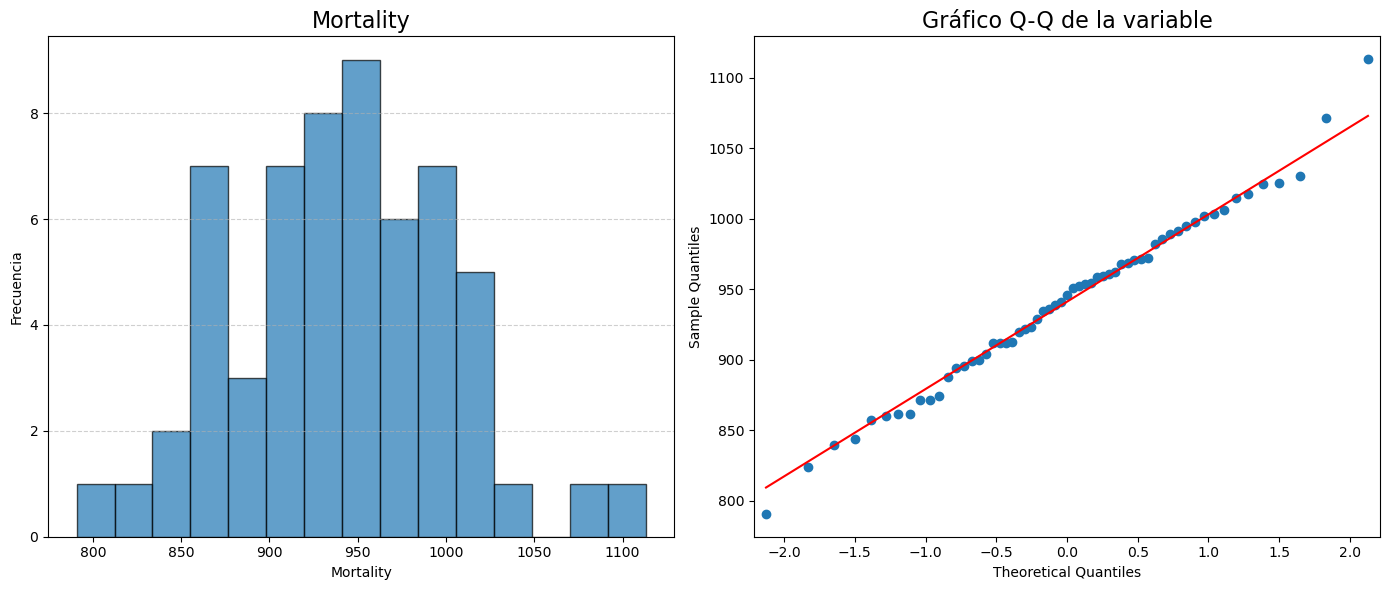

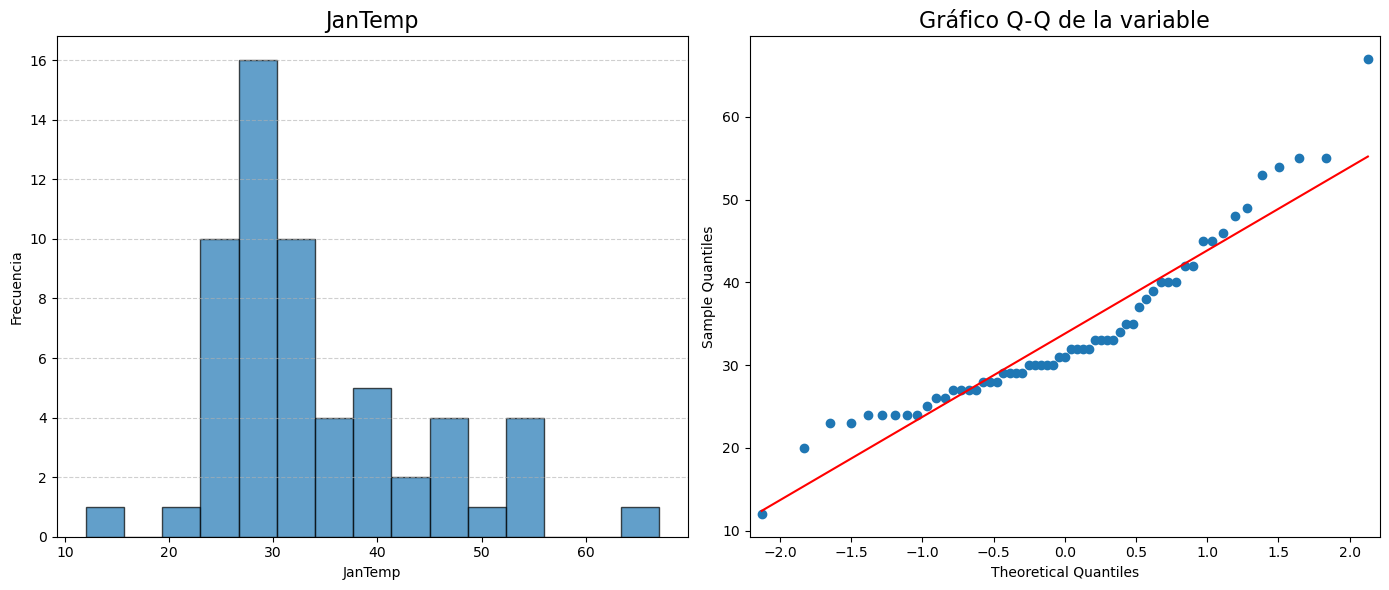

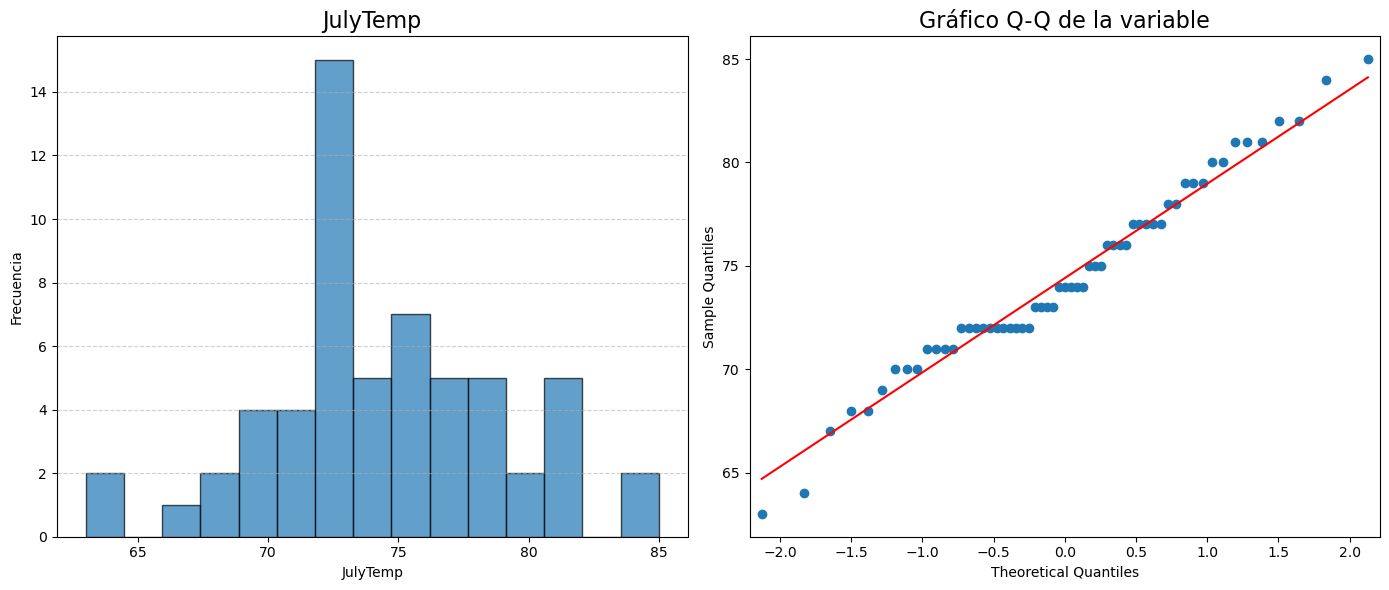

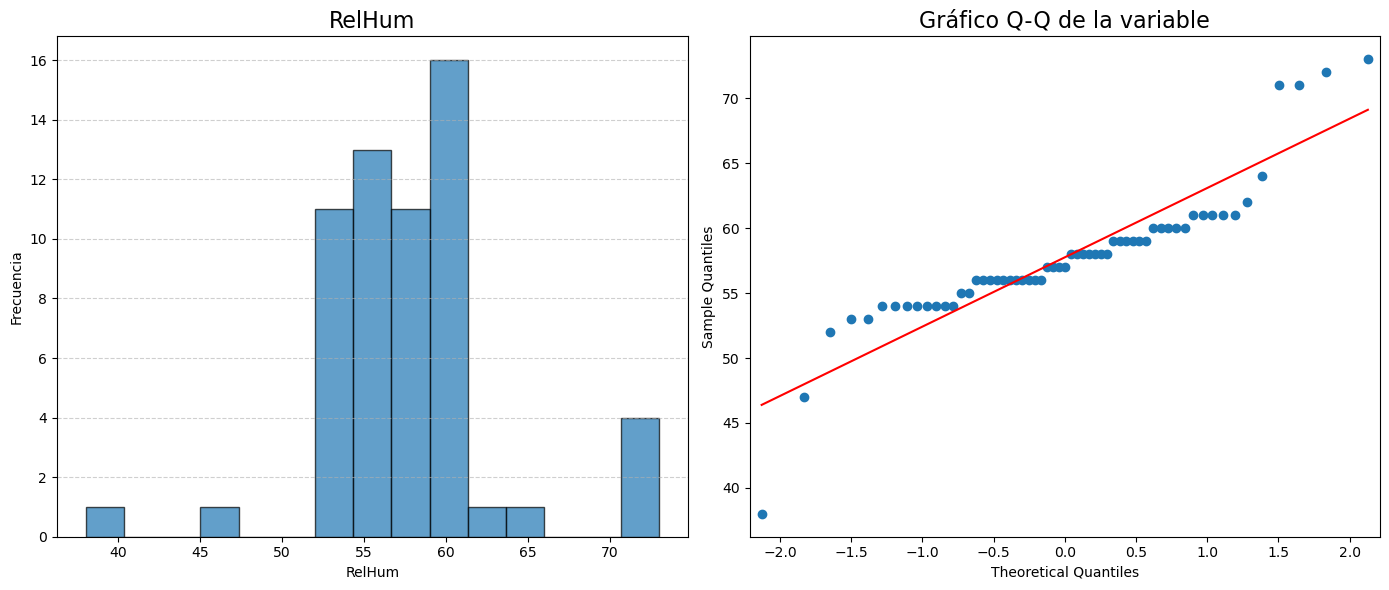

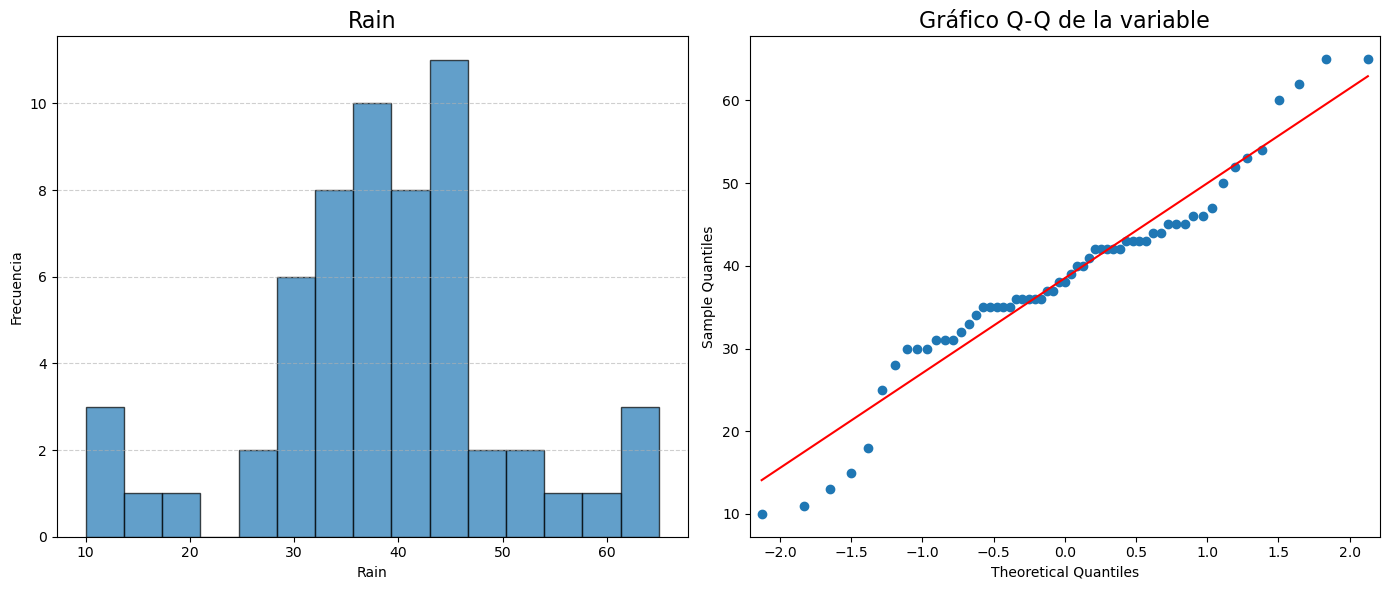

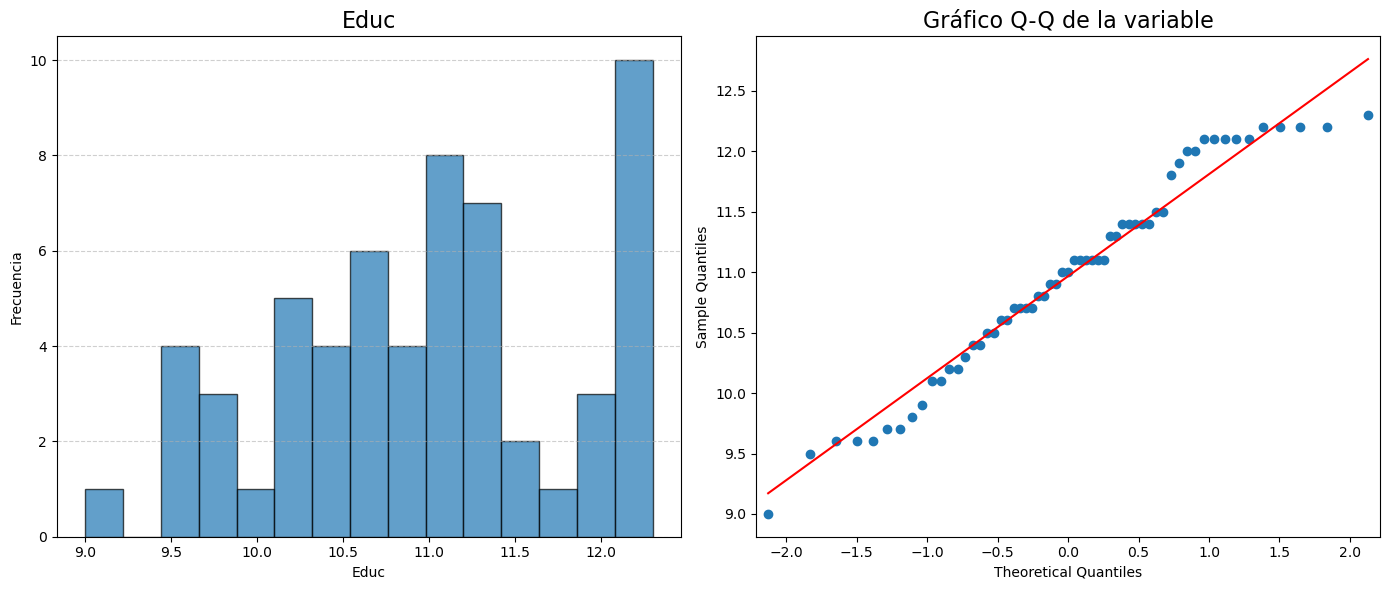

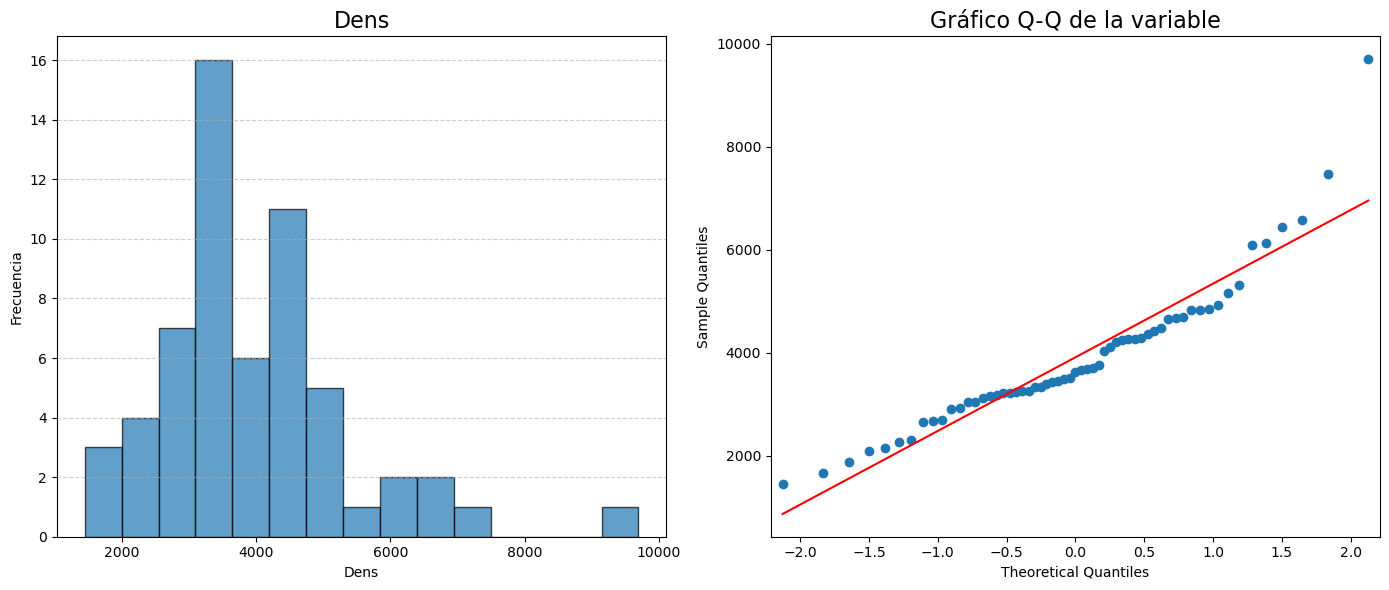

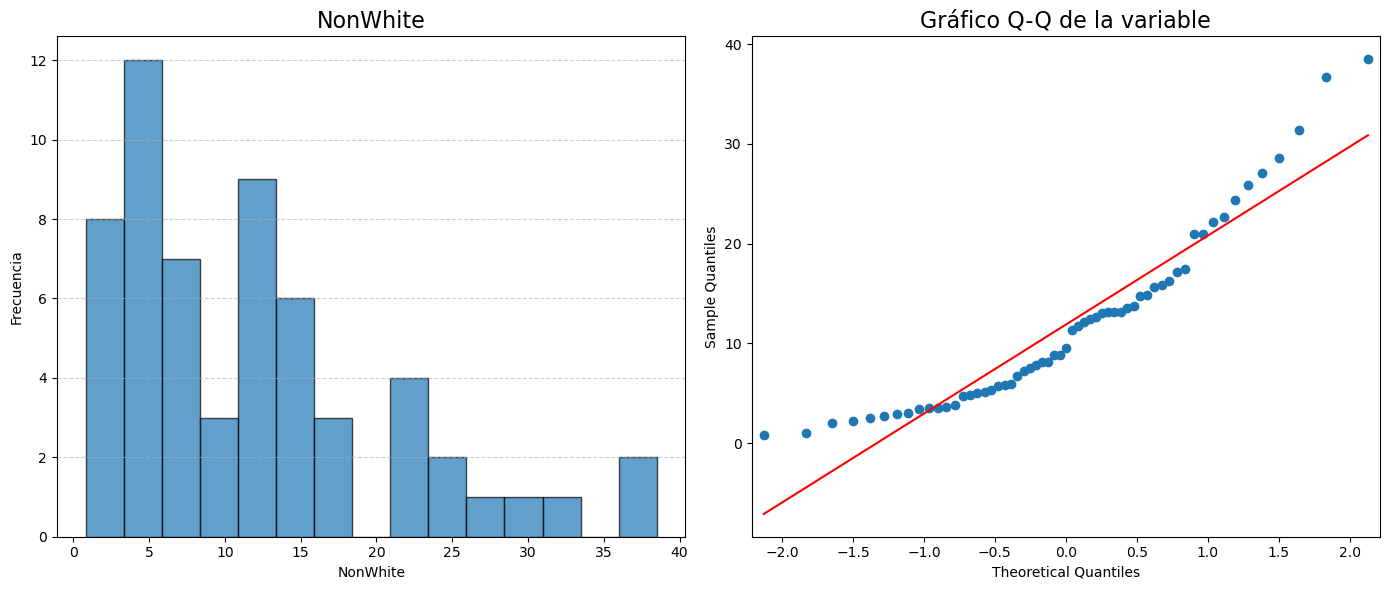

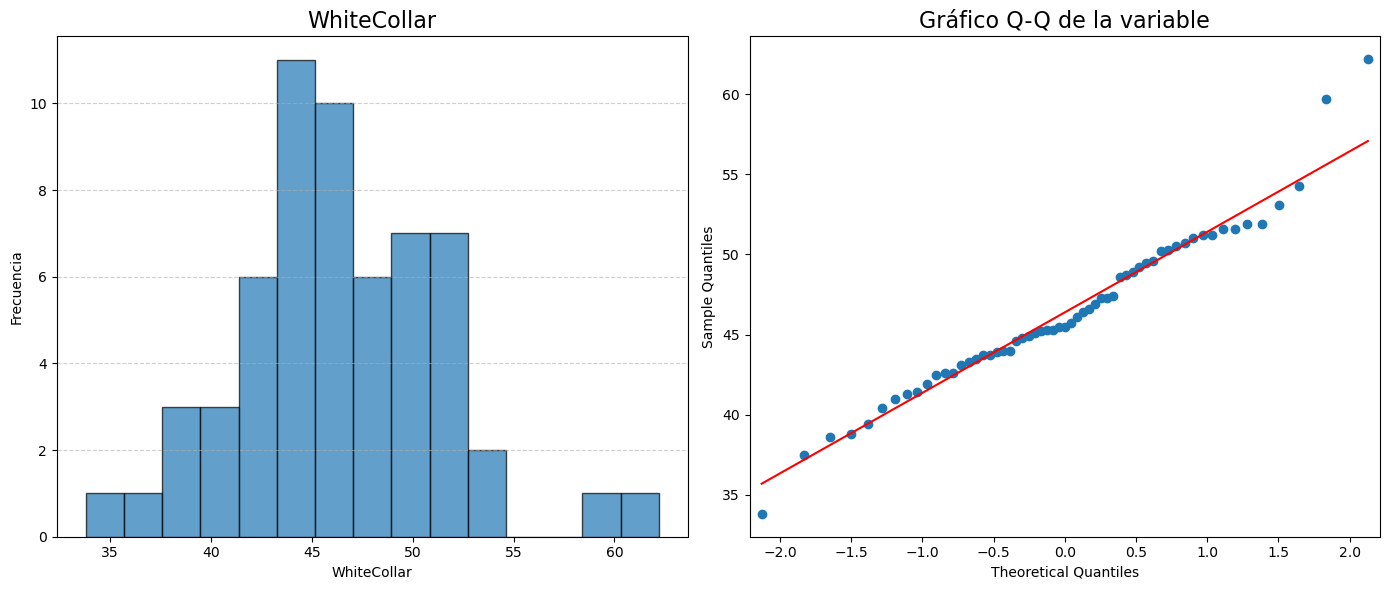

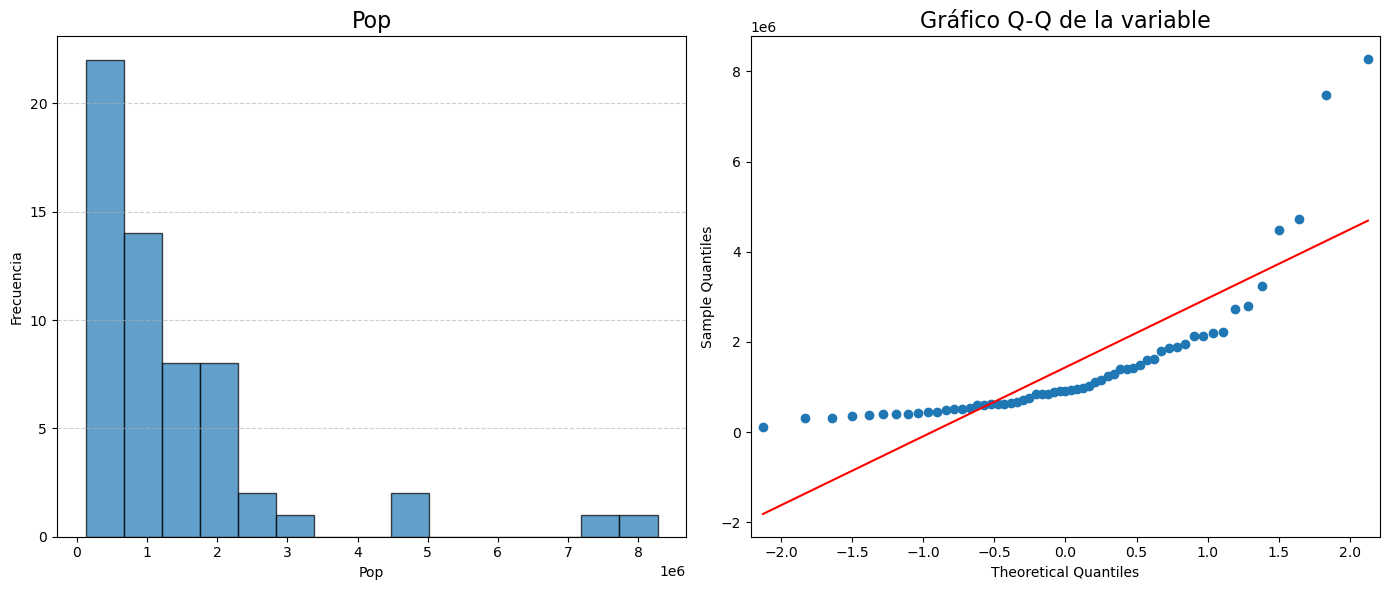

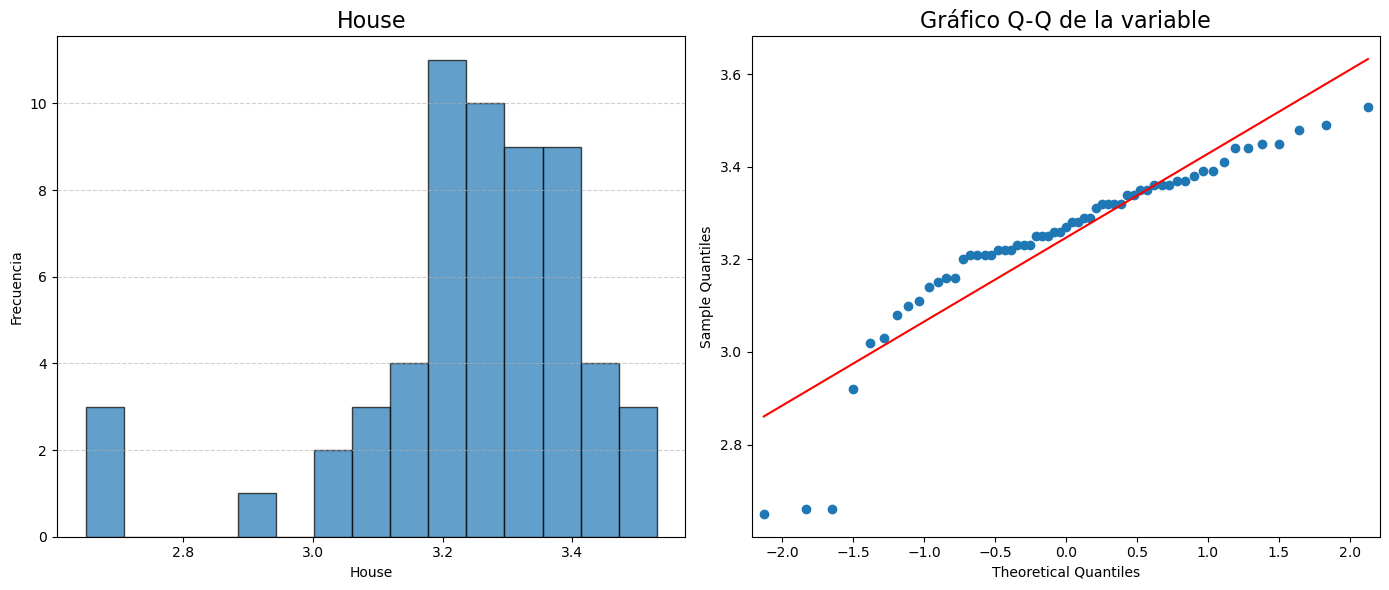

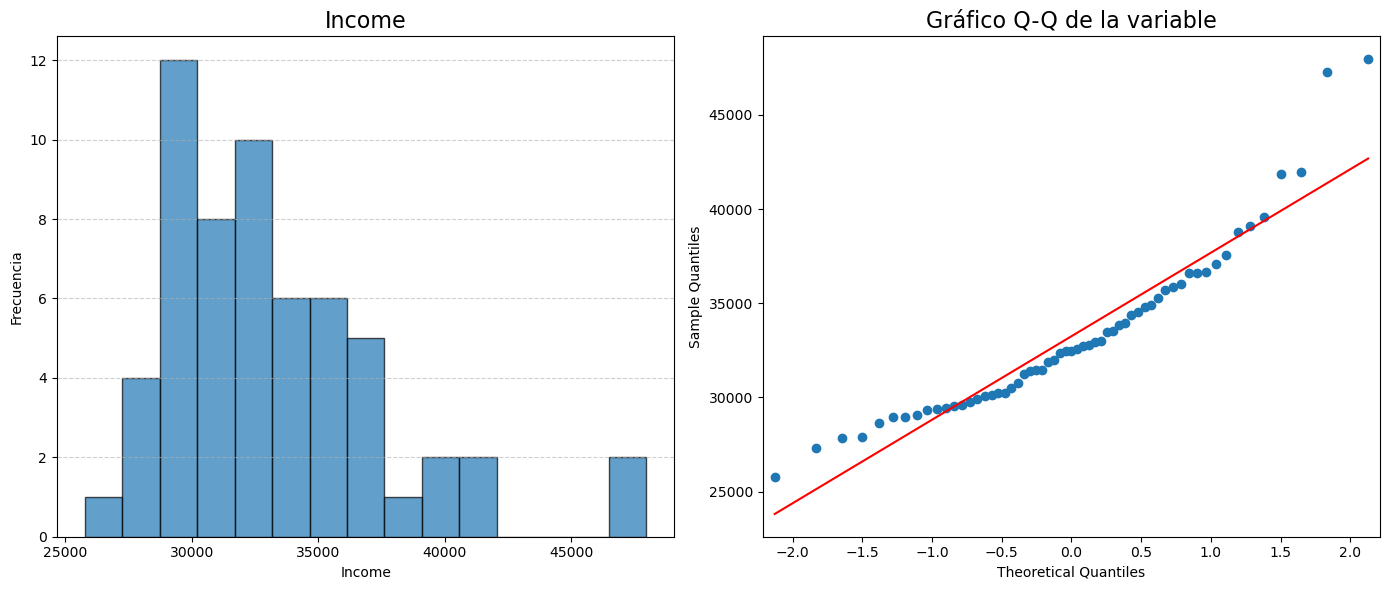

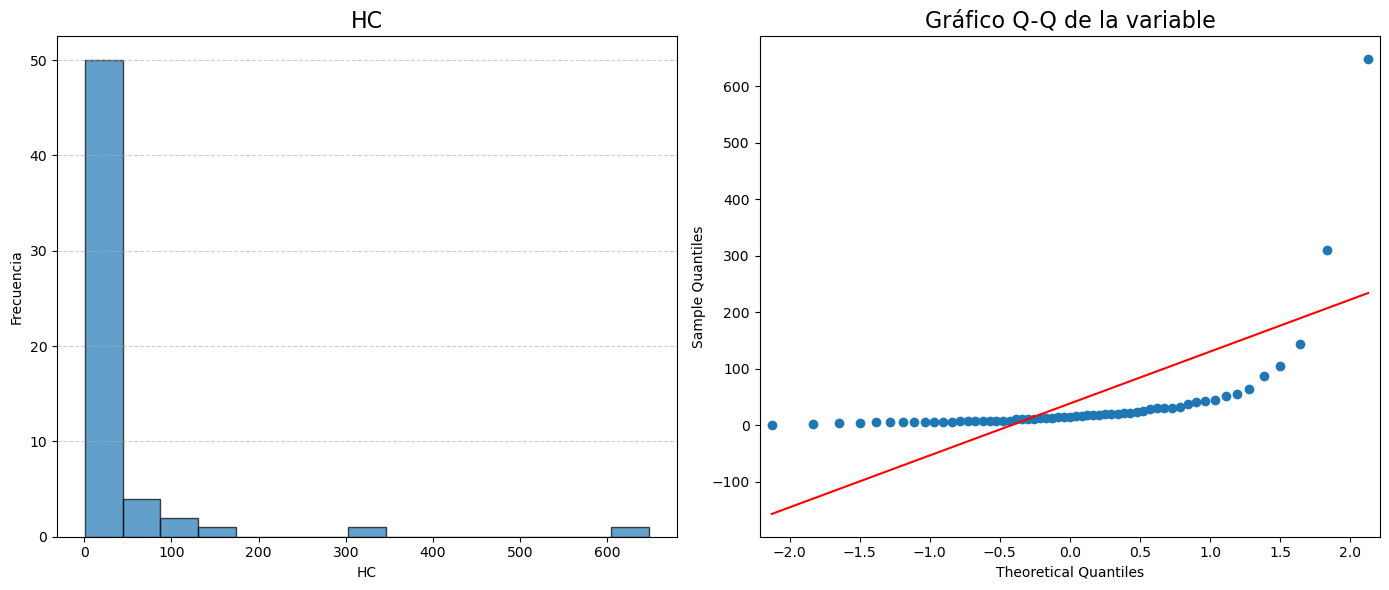

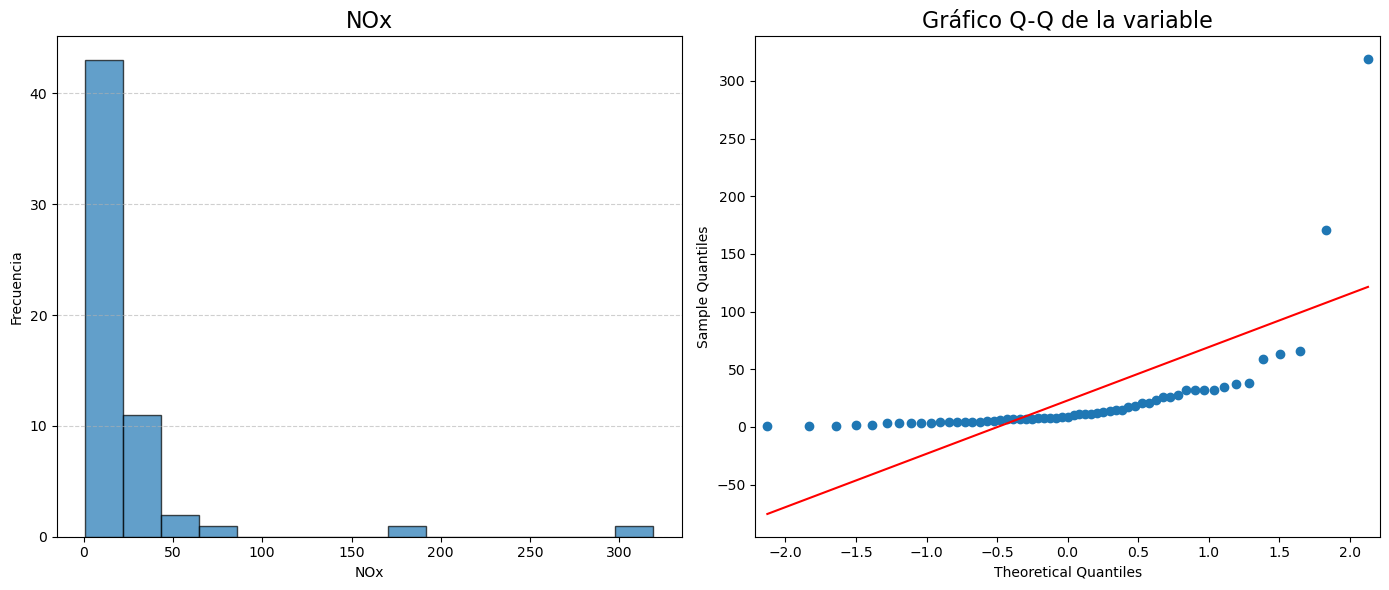

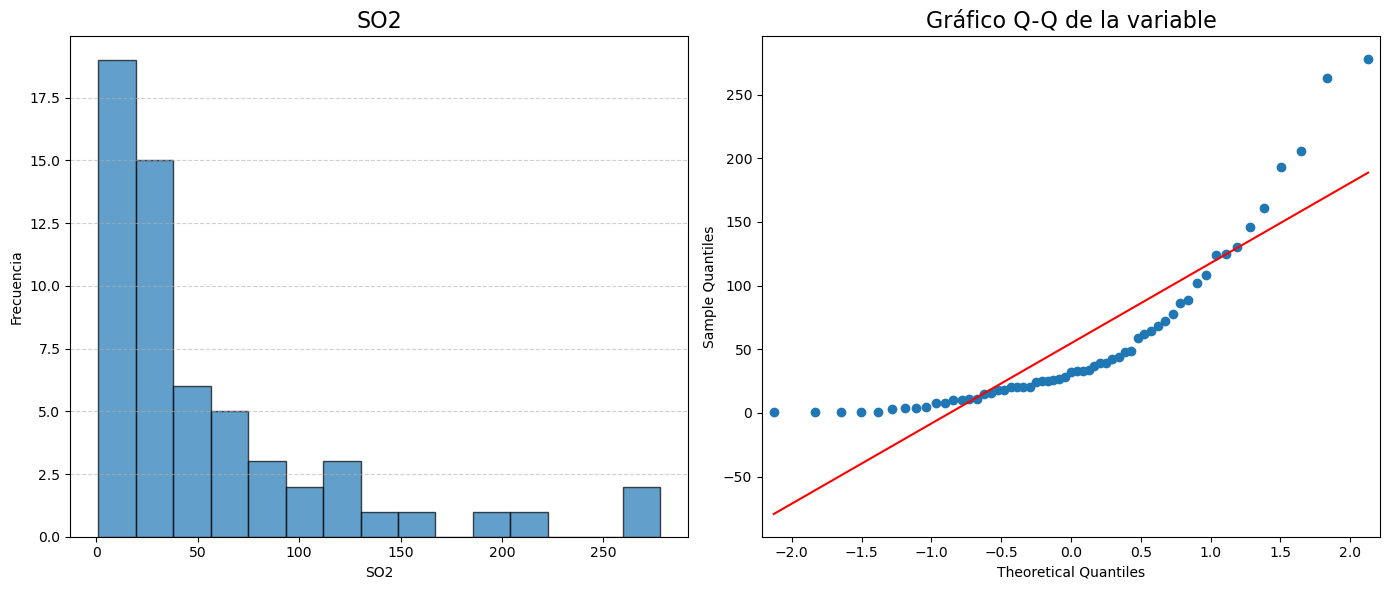

In [134]:
def plot_mortality_diagnostics(df, variable):
    """
    Genera un histograma y un gráfico Q-Q para la variable 'Mortality'.
    """
    # 1. Extraer la columna 'Mortality'
    y = df[variable].values
    
    # 2. Configurar la figura para los gráficos
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # 3. Graficar el histograma
    axes[0].hist(y, bins=15, edgecolor='k', alpha=0.7)
    axes[0].set_title(variable, fontsize=16)
    axes[0].set_xlabel(variable)
    axes[0].set_ylabel('Frecuencia')
    axes[0].grid(axis='y', linestyle='--', alpha=0.6)
    
    # 4. Graficar el Q-Q plot
    sm.qqplot(y, line='s', ax=axes[1])
    axes[1].set_title('Gráfico Q-Q de la variable', fontsize=16)
    
    plt.tight_layout()
    plt.show()

for nombre in df_mortality.columns:
    plot_mortality_diagnostics(df_mortality, nombre)